In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                   index=pd.Index(["Ohio", "Colorado"], name="state"),
                   columns=pd.Index(["one", "two", "three"],
                                   name="number"))

In [3]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [4]:
result = data.stack()

In [5]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [6]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [7]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [8]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [9]:
s1 = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"], dtype="Int64")

In [10]:
s2 = pd.Series([4, 5, 6], index=["c", "d", "e"], dtype="Int64")

In [11]:
s1

a    0
b    1
c    2
d    3
dtype: Int64

In [12]:
s2

c    4
d    5
e    6
dtype: Int64

In [13]:
data2 = pd.concat([s1, s2], keys=["one", "two"])

In [14]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [15]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,<NA>
two,<NA>,<NA>,4,5,6


In [16]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [17]:
data2.unstack().stack(dropna=False)

one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [18]:
df = pd.DataFrame({"left": result, "right": result + 5},
                 columns=pd.Index(["left", "right"], name="side"))

In [19]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [20]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [21]:
df.unstack(level="state").stack(level="side")

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [22]:
data = pd.read_csv("data/macrodata.csv")

In [23]:
data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]

In [24]:
data.head()

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2


In [25]:
periods = pd.PeriodIndex(year=data.pop("year"),
                        quarter=data.pop("quarter"),
                        name="date")

In [26]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [27]:
data.index = periods.to_timestamp("D")

In [28]:
data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [29]:
data = data.reindex(columns=["realgdp", "infl", "unemp"])

In [30]:
data.columns.name = "item"

In [31]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [32]:
long_data = (data.stack()
            .reset_index()
            .rename(columns={0: "value"}))

In [33]:
long_data[:10]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
5,1959-04-01,unemp,5.100
6,1959-07-01,realgdp,2775.488
7,1959-07-01,infl,2.740
8,1959-07-01,unemp,5.300
9,1959-10-01,realgdp,2785.204


In [34]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt

In [36]:
data = np.arange(10)

In [37]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

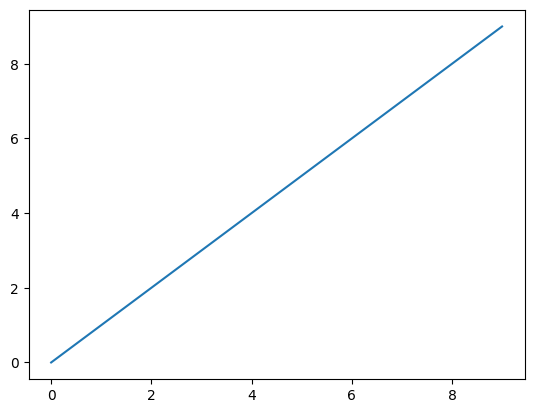

In [38]:
plt.plot(data)

In [39]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [41]:
ax1 = fig.add_subplot(2, 2, 1)

In [42]:
ax2 = fig.add_subplot(2, 2, 2)

In [43]:
ax3 = fig.add_subplot(2, 2, 3)

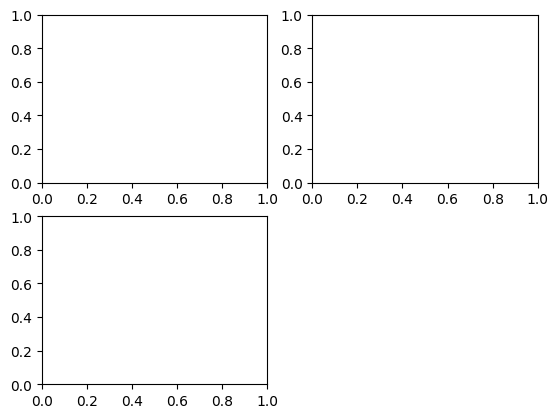

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [46]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
        linestyle="dashed");

In [47]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);

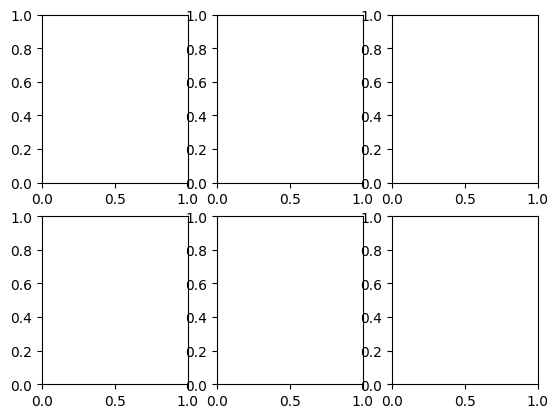

In [49]:
fig, axes = plt.subplots(2, 3)

In [50]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

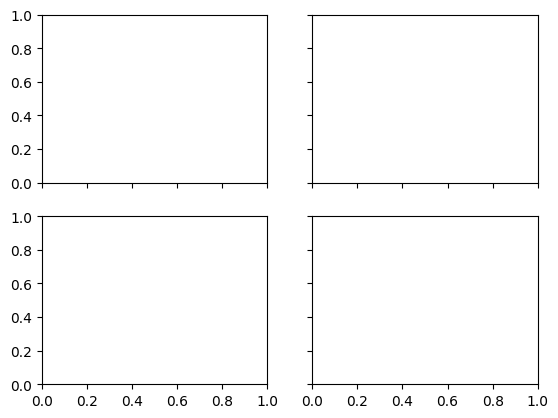

In [51]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [53]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                       color="black", alpha=0.5)
        fig.subplots_adjust(wspace=0, hspace=0)

In [55]:
ax = fig.add_subplot()

In [56]:
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
       linestyle="dashed", marker="o");

In [57]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [58]:
ax = fig.add_subplot()

In [59]:
data = np.random.standard_normal(30).cumsum()

In [60]:
ax.plot(data, color="black", linestyle="dashed", label="Default");

In [61]:
ax.plot(data, color="black", linestyle="dashed",
       drawstyle="steps-post", label="steps-post");

In [62]:
ax.legend()

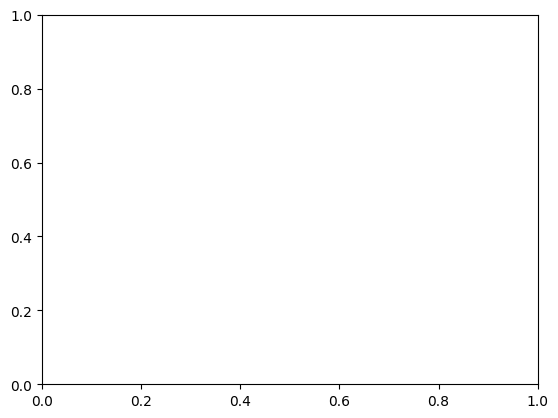

In [63]:
fig, ax = plt.subplots()

In [64]:
ax.plot(np.random.standard_normal(1000).cumsum());

In [65]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [66]:
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)

In [67]:
ax.set_xlabel("Stages")

Text(0.5, 4.444444444444445, 'Stages')

In [68]:
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

In [71]:
ax.set(title="My first matplotlib plot", xlabel="Stages")

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 4.444444444444445, 'Stages')]

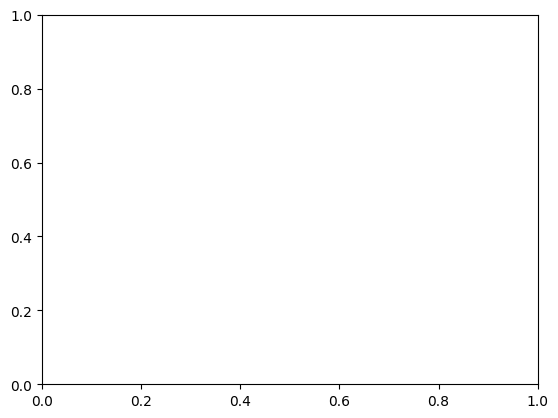

In [72]:
fig, ax = plt.subplots()

In [73]:
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");

In [74]:
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed")

In [75]:
ax.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

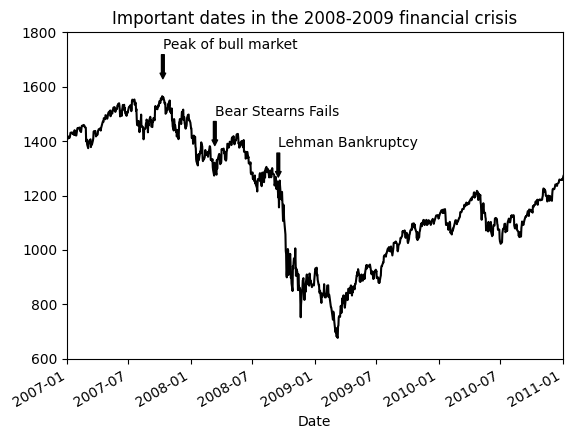

In [79]:
from datetime import datetime
fig, ax = plt.subplots()
data = pd.read_csv("data/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
        (datetime(2007, 10, 11), "Peak of bull market"),
        (datetime(2008, 3, 12), "Bear Stearns Fails"),
        (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                    xytext=(date, spx.asof(date) + 225),
                    arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                    headlength=4),
                    horizontalalignment="left", verticalalignment="top")
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

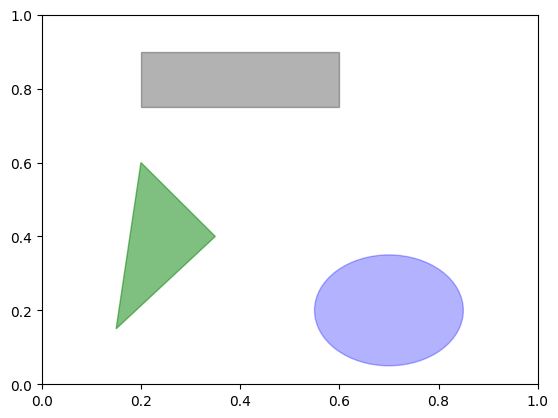

In [83]:
fig, ax = plt.subplots()
    
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
                   
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [84]:
fig.savefig("filepath.png", dpi=400)

In [85]:
plt.rc("figure", figsize=(10, 10))